In [0]:
import numpy as np
import pandas as pd

In [0]:
data = pd.read_csv('/file2.csv')
data

,Unnamed: 0,l1,label
0,0,EEG dataset-20200226T161610Z-001/EEG dataset/A...,0
1,1,EEG dataset-20200226T161610Z-001/EEG dataset/A...,0
2,2,EEG dataset-20200226T161610Z-001/EEG dataset/A...,0
3,3,EEG dataset-20200226T161610Z-001/EEG dataset/A...,0
4,4,EEG dataset-20200226T161610Z-001/EEG dataset/A...,0
...,...,...,...
195,95,EEG dataset-20200226T161610Z-001/EEG dataset/E...,1
196,96,EEG dataset-20200226T161610Z-001/EEG dataset/E...,1
197,97,EEG dataset-20200226T161610Z-001/EEG dataset/E...,1
198,98,EEG dataset-20200226T161610Z-001/EEG dataset/E...,1


In [0]:
BASE_DIR = '/content/drive/My Drive/EEG dataset/'
main_data = pd.DataFrame() 

In [0]:
for i in range(data.size):
  tempData =  pd.read_csv(BASE_DIR + data['l1'][i], sep=" ", header=None)
  tempData = tempData.T
  main_data = main_data.append(tempData)
  print(data['l1'][i])          

In [0]:
d1 = pd.read_csv(BASE_DIR + data['l1'][0], sep=" ", header=None)
d2 = pd.read_csv(BASE_DIR + data['l1'][1], sep=" ", header=None)

In [0]:
dasd = pd.DataFrame()
dasd = dasd.append(d1)

In [0]:
dasd = dasd.append(d2.T)


In [0]:
main_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,12,22,35,45,69,74,79,78,66,43,33,36,34,38,36,28,6,-19,-38,-45,-35,-11,6,7,7,-2,-3,5,19,26,25,41,46,52,50,47,38,24,17,3,...,60,48,36,15,-6,-1,8,26,38,32,33,34,41,42,30,16,13,6,-2,-10,-23,-31,-23,-1,19,17,7,-17,-32,-37,-31,-28,-21,-14,-14,-25,-28,-11,8,77
0,-56,-50,-64,-91,-135,-140,-134,-114,-115,-126,-138,-143,-126,-91,-57,-62,-91,-125,-153,-154,-147,-136,-143,-147,-153,-171,-187,-175,-141,-96,-47,-40,-55,-74,-79,-89,-94,-107,-124,-134,...,-146,-134,-138,-136,-144,-141,-146,-141,-117,-67,-20,5,17,-5,-31,-75,-119,-160,-201,-214,-220,-206,-187,-162,-139,-118,-77,-49,-37,-43,-63,-82,-114,-138,-159,-172,-180,-173,-162,-82
0,-37,-22,-17,-24,-31,-20,-5,14,31,31,20,2,0,2,12,23,20,18,17,34,43,47,30,5,-28,-27,-19,-24,-27,-35,-40,-42,-46,-41,-33,-14,3,8,-3,-10,...,55,72,80,66,37,-6,-47,-70,-85,-88,-89,-91,-101,-108,-103,-104,-96,-84,-65,-43,-18,-5,-5,-14,-30,-58,-88,-116,-129,-117,-91,-52,-23,-14,-5,-3,7,3,4,82
0,-31,-43,-39,-39,-9,-5,18,7,-12,-42,-53,-62,-31,-19,-14,5,-2,-31,-68,-108,-92,-76,-41,-41,15,59,99,114,75,25,-13,-2,16,33,48,21,-12,-51,-82,-67,...,-12,16,18,20,23,32,38,35,-3,-34,-45,-50,-12,26,68,85,55,38,32,23,21,-9,-28,-46,-76,-91,-86,-67,-56,-22,-32,-32,-40,-23,-1,11,12,-6,10,33
0,14,26,32,25,16,8,8,12,11,19,23,24,31,38,35,41,44,44,26,11,-4,-25,-32,-27,-32,-31,-23,-19,3,24,44,31,11,16,14,15,-11,-47,-49,-43,...,-2,-28,-52,-37,-27,-8,0,6,8,18,19,8,5,2,14,6,2,-7,4,24,41,35,12,4,12,7,-7,-2,-6,-3,1,-19,-29,-35,-51,-55,-58,-32,-6,-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-40,-58,-75,-88,-89,-81,-67,-52,-28,14,67,114,148,158,161,147,119,68,8,-42,-79,-106,-104,-98,-93,-93,-108,-126,-142,-143,-127,-99,-69,-40,-25,-20,-17,-24,-37,-53,...,-2,-25,-50,-64,-76,-77,-87,-101,-119,-146,-170,-193,-206,-209,-201,-185,-169,-164,-155,-144,-134,-135,-155,-185,-220,-221,-181,-115,-43,8,32,32,32,18,6,-3,-10,-13,-16,-151
0,187,44,-147,-368,-550,-657,-665,-581,-442,-290,-151,-61,10,74,149,213,262,291,306,311,326,359,399,407,391,332,223,96,-84,-305,-509,-667,-709,-660,-536,-392,-247,-134,-61,19,...,679,575,412,117,-275,-672,-957,-1044,-997,-877,-719,-544,-374,-245,-157,-94,-26,39,119,181,237,278,315,342,366,385,399,409,415,428,463,510,562,607,667,748,763,703,446,-537
0,-438,-561,-622,-581,-460,-295,-164,-70,3,66,139,229,257,283,193,105,41,90,220,372,466,488,443,293,92,-169,-351,-500,-587,-621,-534,-402,-232,-127,-63,-8,50,122,220,233,...,-72,-246,-381,-459,-517,-512,-463,-375,-272,-189,-119,-42,51,165,263,354,418,434,407,334,253,184,133,100,93,114,157,228,315,395,440,443,399,319,196,40,-47,-118,-163,-56
0,-476,-518,-521,-362,-68,175,289,184,15,-130,-241,-314,-349,-342,-342,-264,-51,264,633,681,496,96,-242,-399,-462,-495,-476,-366,-159,29,70,-24,-169,-269,-318,-329,-333,-318,-328,-253,...,-114,-120,-69,228,557,882,929,841,613,309,89,-36,-85,-99,-100,-95,-95,-95,-96,-88,-76,-78,-74,-83,-106,-134,-160,-168,-176,-191,-224,-261,-248,-147,36,224,299,246,556,276


In [0]:
main_data = main_data.iloc[:,0:4096]

In [0]:
main_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4056,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,12,22,35,45,69,74,79,78,66,43,33,36,34,38,36,28,6,-19,-38,-45,-35,-11,6,7,7,-2,-3,5,19,26,25,41,46,52,50,47,38,24,17,3,...,64,60,48,36,15,-6,-1,8,26,38,32,33,34,41,42,30,16,13,6,-2,-10,-23,-31,-23,-1,19,17,7,-17,-32,-37,-31,-28,-21,-14,-14,-25,-28,-11,8
0,-56,-50,-64,-91,-135,-140,-134,-114,-115,-126,-138,-143,-126,-91,-57,-62,-91,-125,-153,-154,-147,-136,-143,-147,-153,-171,-187,-175,-141,-96,-47,-40,-55,-74,-79,-89,-94,-107,-124,-134,...,-156,-146,-134,-138,-136,-144,-141,-146,-141,-117,-67,-20,5,17,-5,-31,-75,-119,-160,-201,-214,-220,-206,-187,-162,-139,-118,-77,-49,-37,-43,-63,-82,-114,-138,-159,-172,-180,-173,-162
0,-37,-22,-17,-24,-31,-20,-5,14,31,31,20,2,0,2,12,23,20,18,17,34,43,47,30,5,-28,-27,-19,-24,-27,-35,-40,-42,-46,-41,-33,-14,3,8,-3,-10,...,27,55,72,80,66,37,-6,-47,-70,-85,-88,-89,-91,-101,-108,-103,-104,-96,-84,-65,-43,-18,-5,-5,-14,-30,-58,-88,-116,-129,-117,-91,-52,-23,-14,-5,-3,7,3,4
0,-31,-43,-39,-39,-9,-5,18,7,-12,-42,-53,-62,-31,-19,-14,5,-2,-31,-68,-108,-92,-76,-41,-41,15,59,99,114,75,25,-13,-2,16,33,48,21,-12,-51,-82,-67,...,11,-12,16,18,20,23,32,38,35,-3,-34,-45,-50,-12,26,68,85,55,38,32,23,21,-9,-28,-46,-76,-91,-86,-67,-56,-22,-32,-32,-40,-23,-1,11,12,-6,10
0,14,26,32,25,16,8,8,12,11,19,23,24,31,38,35,41,44,44,26,11,-4,-25,-32,-27,-32,-31,-23,-19,3,24,44,31,11,16,14,15,-11,-47,-49,-43,...,20,-2,-28,-52,-37,-27,-8,0,6,8,18,19,8,5,2,14,6,2,-7,4,24,41,35,12,4,12,7,-7,-2,-6,-3,1,-19,-29,-35,-51,-55,-58,-32,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-40,-58,-75,-88,-89,-81,-67,-52,-28,14,67,114,148,158,161,147,119,68,8,-42,-79,-106,-104,-98,-93,-93,-108,-126,-142,-143,-127,-99,-69,-40,-25,-20,-17,-24,-37,-53,...,23,-2,-25,-50,-64,-76,-77,-87,-101,-119,-146,-170,-193,-206,-209,-201,-185,-169,-164,-155,-144,-134,-135,-155,-185,-220,-221,-181,-115,-43,8,32,32,32,18,6,-3,-10,-13,-16
0,187,44,-147,-368,-550,-657,-665,-581,-442,-290,-151,-61,10,74,149,213,262,291,306,311,326,359,399,407,391,332,223,96,-84,-305,-509,-667,-709,-660,-536,-392,-247,-134,-61,19,...,714,679,575,412,117,-275,-672,-957,-1044,-997,-877,-719,-544,-374,-245,-157,-94,-26,39,119,181,237,278,315,342,366,385,399,409,415,428,463,510,562,607,667,748,763,703,446
0,-438,-561,-622,-581,-460,-295,-164,-70,3,66,139,229,257,283,193,105,41,90,220,372,466,488,443,293,92,-169,-351,-500,-587,-621,-534,-402,-232,-127,-63,-8,50,122,220,233,...,107,-72,-246,-381,-459,-517,-512,-463,-375,-272,-189,-119,-42,51,165,263,354,418,434,407,334,253,184,133,100,93,114,157,228,315,395,440,443,399,319,196,40,-47,-118,-163
0,-476,-518,-521,-362,-68,175,289,184,15,-130,-241,-314,-349,-342,-342,-264,-51,264,633,681,496,96,-242,-399,-462,-495,-476,-366,-159,29,70,-24,-169,-269,-318,-329,-333,-318,-328,-253,...,-111,-114,-120,-69,228,557,882,929,841,613,309,89,-36,-85,-99,-100,-95,-95,-95,-96,-88,-76,-78,-74,-83,-106,-134,-160,-168,-176,-191,-224,-261,-248,-147,36,224,299,246,556


In [0]:
all_data = main_data.values

In [0]:
y_temp1 = np.zeros(100)
for i in range(y_temp1.shape[0]):
  y_temp1[i] = 1

y_temp2 = np.zeros(100)  
y = np.append(y_temp2,y_temp1,axis=0)

In [0]:
y = y.reshape(y.shape[0],1)

In [0]:
from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(all_data, y, test_size=0.1)

In [0]:
k = main_data.iloc[0,0:512].values

In [0]:
k = k.reshape(1,k.shape[0])

In [0]:
X_train_data[1,0:512].shape

(512,)

In [0]:
y_train_data.shape

(180, 1)

In [0]:
y_train_final = np.array([1])

In [0]:
y_train_final.max()

1

In [0]:
for i in range(y_train_data.shape[0]):
    if(y_train_data[i] == 1):
        y_train_final = np.append(y_train_final,np.ones(57))
    elif(y_train_data[i] == 0):
        y_train_final = np.append(y_train_final,np.zeros(57))                


In [0]:
y_train_final = y_train_final[1:]

In [0]:
mv = k

for i in range(X_train_data.shape[0]):
    print(i)
    for j in range(57):
        k = X_train_data[i,j*64:(j*64+512)]
        k = k.reshape(1,k.shape[0])
        # k = main_data.iloc[i,j*64:(j*64+512)].values
        mv = np.append(mv,k,axis=0)     
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


In [0]:
p = mv[1:,:]

In [0]:
p.shape

(10260, 512)

In [0]:
from sklearn import preprocessing
normalized_X = preprocessing.normalize(p)
normalized_X.shape

(10260, 512)

In [0]:
normalized_X

array([[-0.04944219, -0.05768256, -0.04355622, ..., -0.01648073,
         0.03296146,  0.03531585],
       [-0.0430937 , -0.03610553, -0.04658778, ..., -0.00698817,
        -0.00815286, -0.01863511],
       [-0.01736515, -0.03357262, -0.04514938, ...,  0.04862241,
         0.05556847,  0.05556847],
       ...,
       [-0.05211797, -0.05857888, -0.07049566, ...,  0.05671239,
         0.05527664,  0.0472364 ],
       [-0.04816425, -0.04567552, -0.04582191, ...,  0.06368221,
         0.05958313,  0.05445927],
       [-0.05254698, -0.05254698, -0.05121104, ..., -0.07436733,
        -0.03992976,  0.00445313]])

In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet import MobileNet
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.xception import Xception
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.initializers import glorot_uniform
from keras.layers import (Activation, BatchNormalization, Conv2D, Conv1D,Dense,
                          Dropout, Flatten, MaxPooling2D)
from keras.losses import binary_crossentropy
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from matplotlib import image
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [0]:
normalized_X = normalized_X.reshape(normalized_X.shape[0],normalized_X.shape[1],1)

In [0]:
normalized_X.shape

(10260, 512, 1)

In [0]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.1)

In [0]:
import keras
model = Sequential()
input_shape = (512,1)          # Will Define later
input_shape_m = normalized_X.shape

model.add(Conv1D(24, input_shape=input_shape, kernel_size = 5, strides=3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv1D(16, kernel_size = 3, strides=2))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv1D(8, kernel_size = 3, strides=2))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(20, activation = 'relu', kernel_initializer = 'uniform'))
#model.add(Dropout())

model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))
adam = keras.optimizers.Adam(lr=0.00002, beta_1=0.9, beta_2=0.999, epsilon = 0.00000001, amsgrad=False)
model.compile(optimizer= adam, 
              loss=binary_crossentropy,
              metrics=['accuracy'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit(normalized_X, y_train_final, validation_split=0.1,verbose=1, batch_size=16, epochs=100, shuffle=True)




Train on 9234 samples, validate on 1026 samples
Epoch 1/100





9234/9234 [==============================] - 20s 2ms/step - loss: 0.6917 - acc: 0.5315 - val_loss: 0.6930 - val_acc: 0.5156
Epoch 2/100
9234/9234 [==============================] - 5s 550us/step - loss: 0.6855 - acc: 0.5737 - val_loss: 0.6870 - val_acc: 0.5897
Epoch 3/100
9234/9234 [==============================] - 5s 550us/step - loss: 0.6702 - acc: 0.6275 - val_loss: 0.6664 - val_acc: 0.6823
Epoch 4/100
9234/9234 [==============================] - 5s 553us/step - loss: 0.6376 - acc: 0.6708 - val_loss: 0.6129 - val_acc: 0.7320
Epoch 5/100
9234/9234 [==============================] - 5s 576us/step - loss: 0.5764 - acc: 0.7397 - val_loss: 0.5126 - val_acc: 0.8265
Epoch 6/100
9234/9234 [==============================] - 5s 581us/step - loss: 0.4738 - acc: 0.8378 - val_loss: 0.3763 - val_acc: 0.9425
Epoch 7/100
9234/9234 [==============================] - 5s 549us/step - loss: 0.3578 - acc: 0.8999 - val_loss: 0.2532 - va

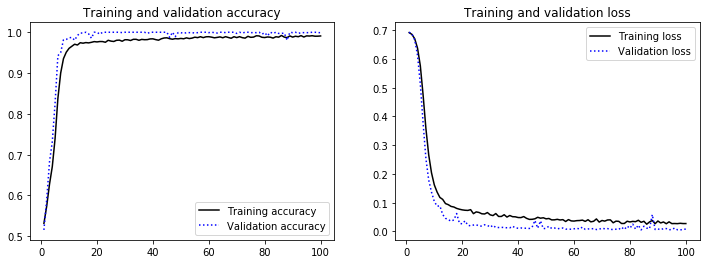

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = [n + 1 for n in range(len(acc))]
fig = plt.figure(figsize=(12, 4))

fig.add_subplot(1, 2, 1)
plt.plot(epochs, acc, 'k', label='Training accuracy')
plt.plot(epochs, val_acc, 'b:', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

fig.add_subplot(1, 2, 2)
plt.plot(epochs, loss, 'k', label='Training loss')
plt.plot(epochs, val_loss, 'b:', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []

kfold = KFold(10, True, 1)

In [0]:
X_test_final.shape

(80, 1024)

In [0]:
k1 = X_test_data[0,1*1024:(1*1024+1024)]
X_test_final = k1.reshape(1,k1.shape[0])

In [0]:
X_test_final = X_test_final[1:]

In [0]:
for i in range(X_test_data.shape[0]):
    for j in range(4):  
        k1 = X_test_data[i,j*1024:(j*1024+1024)]
        k1 = k1.reshape(1,k1.shape[0])
        X_test_final = np.append(X_test_final,k1,axis=0)

In [0]:
X_test_normalize.shape

(80, 1024)

In [0]:
from collections import Counter

def voting(model, X):
    prob = np.zeros(3) 
    for i in range(3):      
        k = X[i*256:( i*256 + 512)]
        k = k.reshape(1,k.shape[0],1)
        prob[i] = model.predict(k)
    print(prob)
    prob = prob > 0.5
    prob = 1*prob
    probList = prob.tolist()
    b = Counter(probList)
    
    return b.most_common(1)[0][0]



In [0]:
 y_pred_test = np.zeros(X_test_final.shape[0])

In [0]:
for i in range(X_test_final.shape[0]):
    y_pred_test[i] = voting(model,X_test_normalize[i])   

[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[0.00044124 0.00018472 0.00113942]
[0.00609873 0.0008417  0.00364827]
[0.00010523 0.00025458 0.000153  ]
[0.00057079 0.0001922  0.00078682]
[0.99840659 0.99980229 0.99978954]
[0.99991024 0.99996328 0.9999696 ]
[0.99998999 0.99998033 0.99997783]
[0.99995065 0.9994579  0.9988029 ]
[1.         0.99999988 0.99999988]
[0.99999988 0.99999988 1.        ]
[1. 1. 1.]
[1. 1. 1.]
[0.99999976 0.99999976 0.99999976]
[1.         0.99999976 0.99999928]
[1.         1.         0.99999928]
[0.99999988 1.         1.        ]
[0.02298463 0.03698364 0.1208514 ]
[0.08669698 0.00092937 0.00215842]
[0.00421741 0.02374796 0.01517048]
[0.02221156 0.02505109 0.093646  ]
[0.00475421 0.00499951 0.27991477]
[0.00167181 0.00145251 0.0053269 ]
[0.00297645 0.10349703 0.10380142]
[0.03021014 0.00189744 0.00159881]
[0.00102408 0.00234125 0.00223729]
[0.00209429 0.00122794 0.00010194]
[0.00059764 0.00316957 0.01719855]
[0.03160362 0.00449198 0.00216897]
[0.00110147 0.00056301 0

In [0]:
X_test_normalize = preprocessing.normalize(X_test_final)

In [0]:
y_test_data

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [0]:
p1 = X_test_final[0,256:512+256]
p1 = p1.reshape(1,512,1)
model.predict(p1)

In [0]:
X_test_final.shape

(80, 1024)

In [0]:
y_test_data.shape

(20, 1)

In [0]:
y_test_final = np.array([0])
for i in range(y_test_data.shape[0]):
    if(y_test_data[i] == 1):
        y_test_final = np.append(y_test_final,np.ones(4))
    elif(y_test_data[i] == 0):
        y_test_final = np.append(y_test_final,np.zeros(4))                


In [0]:
y_test_final.shape

(80,)

In [0]:
y_test_final = y_test_final[1:]

In [0]:
X_train_data.shape

(180, 4096)

In [0]:
y_test_final

array([1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
y_pred_test

array([1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_final,y_pred_test)

In [0]:
cm

array([[48,  0],
       [ 0, 32]])

In [0]:
((np.trace(cm))/np.sum(cm))*100

100.0